# Daqtales Notebook to create, modify and visualize CSV files

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

firstTimeUse=False # set to True if this is your first time using this notebook (really! do it...) 

## Getting Started

In [2]:
from voxelTable import * 
from patterns import line, plane
import numpy as np
import matplotlib.pyplot as plt
from math import sin,cos,pi,exp

if firstTimeUse:
    import voxelTable
    help(voxelTable)
    help(patterns)

path = None

### get help on the defined functions (or on python in general)

In [5]:
help(moveBeyond)

Help on function moveBeyond in module voxelTable:

moveBeyond(array, x=None, y=None, z=None)
    Moves the most left bottum voxel to the specified coordinate. Such that the entire object is beyond the specified coordinate.



### Object Data Type and Object Manipulation

A voxel consists of an x,y z,Pset,p1,p2,p3 and p4 value. It is stored in a two dimensional numpy array. By itself this allows for some really convinient and efficient modification of the voxels with all known numpy tricks. But to facilitate usage the numpy array has a custom defined datay type ``dt``:

In [6]:
dt

dtype([('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('Vdepo', '<f8'), ('p1', '<f8'), ('p2', '<f8'), ('p3', '<f8'), ('p4', '<f8')])

This allows for pretty nice ussage with known numpy slicing and adds the benefit of having named columns. Note the available rows are: **x**, **y**, **z**, **Vdepo**, **p1**, **p2**,**p3** and **p4**. Adding the additional benefit of having a well defined type and therefore a well defined shape. Some Basic usage examples follow.

Creating from scratch or loading from a file:

In [7]:
material = (-0.5,0,7,0,0)
va = [(0,0,0.25,*material),(0,0,0.5,*material),(0,1,0.25,-0.024,7,0,0,0)]
va = np.array(va,dtype=dt)
vb = load('dummy.csv')

Note: the ``*`` operator unpacks a list/tuple, it works as if every element of a list/tuple has been provided individually. This allows for easier use of materials.

Iterating throught lines:

In [8]:
print('va:')
for i in va:
    print(i)
print('vb:')
for i in vb:
    print(i)

va:
(0., 0., 0.25, -0.5, 0., 7., 0., 0.)
(0., 0., 0.5, -0.5, 0., 7., 0., 0.)
(0., 1., 0.25, -0.024, 7., 0., 0., 0.)
vb:
(15., 15., 0., -0.24, 0., 0., 0., 13.)
(16., 15., 0., -0.24, 0., 0., 0., 13.)
(17., 15., 0., -0.24, 0., 0., 0., 13.)
(18., 15., 0., -0.24, 0., 0., 0., 13.)
(18., 16., 0., -0.24, 0., 0., 0., 13.)
(18., 17., 0., -0.24, 0., 0., 0., 13.)
(18., 18., 0., -0.24, 0., 0., 0., 13.)
(17., 18., 0., -0.24, 0., 0., 0., 13.)
(16., 18., 0.5, -0.24, 0., 0., 0., 13.)
(15., 18., 0.5, -0.24, 0., 0., 0., 13.)
(15., 17., 0.5, -0.24, 0., 0., 0., 13.)
(15., 16., 0.5, -0.24, 0., 0., 0., 13.)


Acces rows and columns as usuall with numpy:

In [9]:
print(va[0:2]) # first two rows
print(len(vb))
print(vb['x']) # all x values

[(0., 0., 0.25, -0.5, 0., 7., 0., 0.) (0., 0., 0.5 , -0.5, 0., 7., 0., 0.)]
12
[15. 16. 17. 18. 18. 18. 18. 17. 16. 15. 15. 15.]


Modify values manually:

In [10]:
va['y'] += -11
va['x'] = 77
print(va)

[(77., -11., 0.25, -0.5  , 0., 7., 0., 0.)
 (77., -11., 0.5 , -0.5  , 0., 7., 0., 0.)
 (77., -10., 0.25, -0.024, 7., 0., 0., 0.)]


Filter for a specific Vdepo value.

In [11]:
for i in va:
    if i['Vdepo'] == -0.5:
        i['Vdepo'] = -0.024
print(va)

[(77., -11., 0.25, -0.024, 0., 7., 0., 0.)
 (77., -11., 0.5 , -0.024, 0., 7., 0., 0.)
 (77., -10., 0.25, -0.024, 7., 0., 0., 0.)]


Delete a voxel at the specific index 0.

In [12]:
vc = np.delete(va,0)
print(vc)

[(77., -11., 0.5 , -0.024, 0., 7., 0., 0.)
 (77., -10., 0.25, -0.024, 7., 0., 0., 0.)]


Add to every value provided the specific amount.

In [13]:
add(vc,x=-77,Vdepo=-0.01)
print(vc)

[(0., -11., 0.5 , -0.034, 0., 7., 0., 0.)
 (0., -10., 0.25, -0.034, 7., 0., 0., 0.)]


Move the first voxel in a structure to a specified position or move a structure beyond the specified point. As a third option one can simply ``add`` to a voxel table. As with allmost all functions: simply don't provide a value to leave it untouched.

In [14]:
moveFirstVoxel(vc,x=1,)
print(vc)
moveBeyond(vc,x=10,y=10,z=10)
print(vc)
add(vc,x=50,z=50)
print(vc)

[(1., -11., 0.5 , -0.034, 0., 7., 0., 0.)
 (1., -10., 0.25, -0.034, 7., 0., 0., 0.)]
[(10., 10., 10.25, -0.034, 0., 7., 0., 0.)
 (10., 11., 10.  , -0.034, 7., 0., 0., 0.)]
[(60., 10., 60.25, -0.034, 0., 7., 0., 0.)
 (60., 11., 60.  , -0.034, 7., 0., 0., 0.)]


Merging structures to create more complex ones and saving them.

In [15]:
vd = merge(va,vc)
save(vd,'deleteMe.csv')

## Object plotting
Many functions in this library rely on the same condition. A small set of arguments is required. But behavior can be tweaked by named arguments. See `help(function)` for more details on a specific procedure.

Object Plotting is greatly facilitated by the provided functions. This is another oportunity to stretch the importance of the voxel defining standart. The coordinate given is interpreted as the middle of the top surface of the voxel. Easy to remember: the position given corresponds to the cantilever tip during printing.

In [16]:
help(plotObject)

Help on function plotObject in module voxelTable:

plotObject(voxels, size, border=True, info=False, colorDict=None, path=None)
    Plots the object in 3D space. This only works if the voxels are true voxels,
    meaning they can bee seen as having a constant size.
    `border=False` prevents the drawed voxels to be outlined with black
    `info=True` prints usefull positioning and dimension information
    `colorDict` provide to override the auto coloring. set ``info=True`` for details
    `path` set to a file path to save the plot as .png instead of interactive rendering.



Voxels printed: 1. Faces printed: 6. Lines drawn: 12.

xmax=0.5, xmin=-0.5, ymax=0.5, ymin=-0.5, zmax=0.25, zmin=0.0
maxRange=1.0, xRange=1.0, yRange=1.0, zRange=0.25
xCenter=0.0, yCenter=0.0, zCenter=0.125

colorValues used for this plot:
{'(-0.024, 0.0, 7.0, 0.0, 0.0)': [0.494, 0.0, 0.569]} 
None


<IPython.core.display.Javascript object>


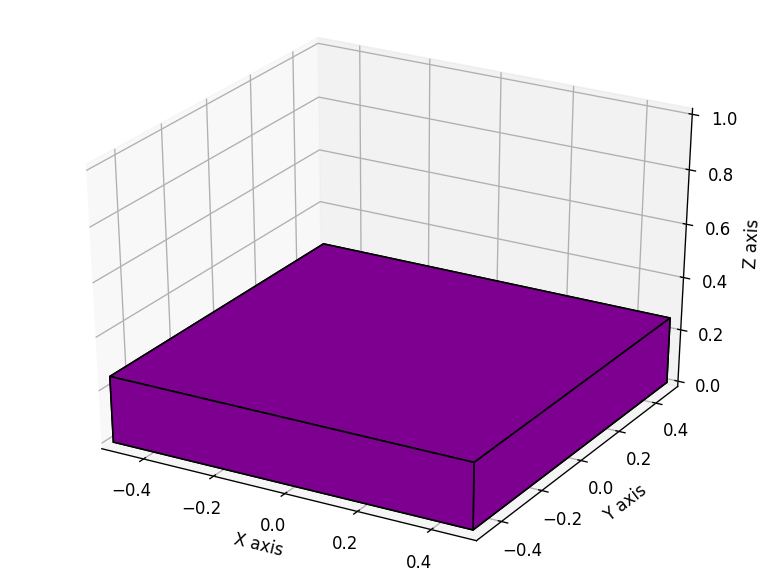

Plotting used 0.019509 seconds.


In [20]:
size=[1,1,0.25]
obj = np.array([(0,0,0.25,-0.024,0,7,0,0)],dtype=dt)
plotObject(obj,size,info=True)
r,g,b = 1,0,0

One can provide the color customly. Note that the exact string must match. It is easiest to plot an object once with ``info=True`` and the copy and modify the color values. The color values can be provided with [r,g,b] but other format supported by the matplotlib backend work.

Voxels printed: 1. Faces printed: 6. Lines drawn: 12.

xmax=0.5, xmin=-0.5, ymax=0.5, ymin=-0.5, zmax=0.25, zmin=0.0
maxRange=1.0, xRange=1.0, yRange=1.0, zRange=0.25
xCenter=0.0, yCenter=0.0, zCenter=0.125

colorValues used for this plot:
{'(-0.024, 0.0, 7.0, 0.0, 0.0)': [0.4, 0.4, 1]} 
None


<IPython.core.display.Javascript object>


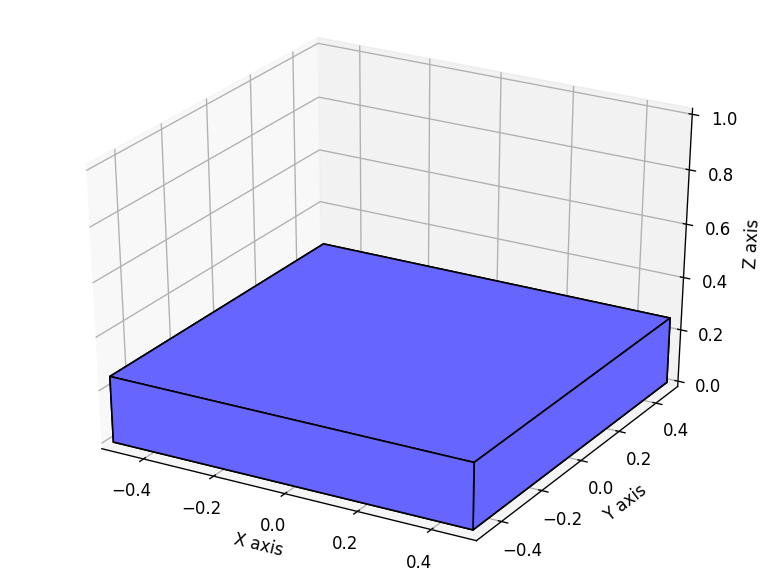

Plotting used 0.023988 seconds.


In [21]:
c = {'(-0.024, 0.0, 7.0, 0.0, 0.0)': [0.4, 0.4, 1]}
plotObject(obj,size,colorDict=c,info=True)

## animated plot (TODO)

In [22]:
#speed = '5v/s'
#animateObject(vb,speed,size=[1,1,0.25])

## Object Creation
### Create by defining a parameterize curve
A sane example follows:

None


<IPython.core.display.Javascript object>


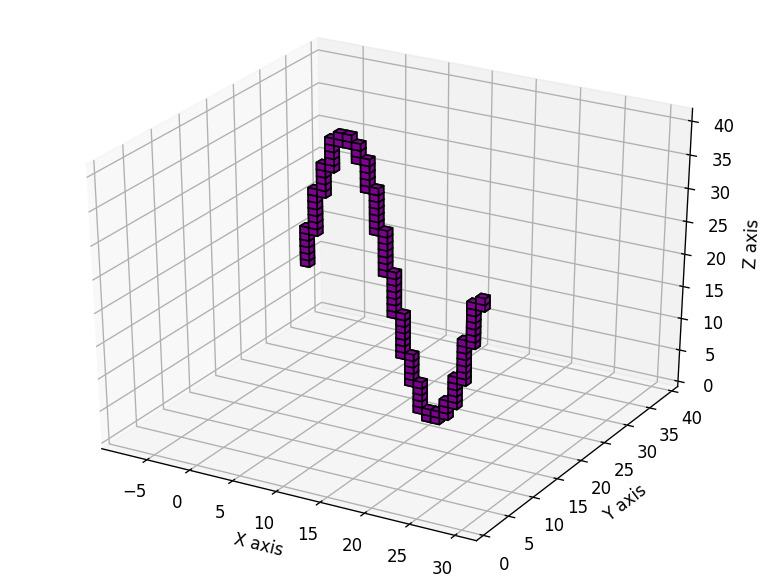

In [23]:
size=[1,1,1]
a = 0.7
def sinus(t):
    '''t in [0,1]'''
    x = 20.0*t+ a
    y = 20
    z = 20*sin(2*pi*t)+21
    return [x,y,z]

voxels = voxelizeCurve(sinus,size,Vdepo=-0.024,p2=7)
sort(voxels)
plotObject(voxels,size=[1,1,1])

Note than a can be anything in [0,0.5] without changing the plot. This is as the size of a voxel is [1,1,1] and therefor the voxel postion gets rounded to the nearest integer position. One can move the plot to the required starting position to fix this problem.

Following is the same example but with a rather strange voxel size. Additionally the ``**`` operator is used to auto unpack a dictionary. This allows easy reuse of a defined material property.

None


<IPython.core.display.Javascript object>


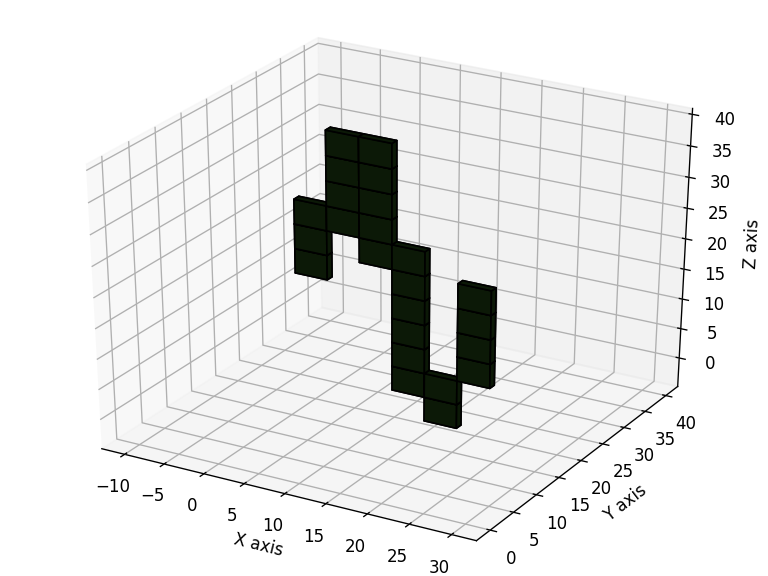

In [24]:
mat = {'Vdepo':-0.039,'p3':17}
voxels = voxelizeCurve(sinus,[4,1,4],**mat)
plotObject(voxels,[4,1,4])

A less sane example folows to understand the underlying positioning principles of voxelizeCurve. A lot of optional Arguments are given. Note: as we really only wonna plot one voxel we don't need to evaluate the function
more than once - so we set `resolution=1`. Normally one might wan't quite a high `resolution`. The default is 1000. For a computationally heavy function the default might be to big. For a really "long" function 1000 data points might not be enough to interpolate it correctly. Understanding how `voxelizeCurve` works makes it easy to make good design desisions. The function takes In the example bellow 

[(1., 0.7, 1., -0.039, 0., 0., 17., 0.)]
Voxels printed: 1. Faces printed: 6. Lines drawn: 12.

xmax=1.5, xmin=0.5, ymax=1.0499999999999998, ymin=0.35, zmax=1.0, zmin=0.0
maxRange=1.0, xRange=1.0, yRange=0.6999999999999998, zRange=1.0
xCenter=1.0, yCenter=0.7, zCenter=0.5

colorValues used for this plot:
{'(-0.039, 0.0, 0.0, 17.0, 0.0)': [0.047, 0.098, 0.027]} 
None


<IPython.core.display.Javascript object>


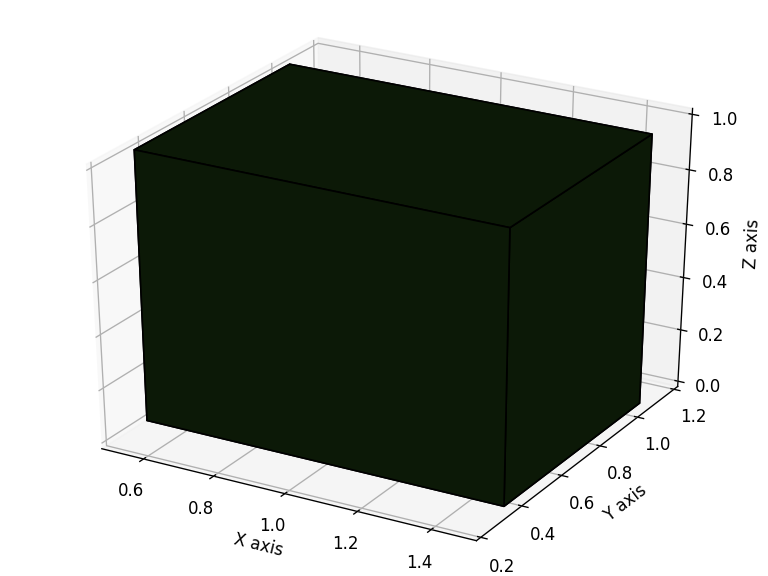

Plotting used 0.022950 seconds.


In [26]:
def f(t):
    return (1,0.4,1)

size = [1,0.7,1]
voxels = voxelizeCurve(f,size,resolution=1,**mat)
print(voxels)
plotObject(voxels,size,info=True)

### Create by defining a mathematical set in a grid
 The idea here is that one defines a function that takes the x, y and z coordinate of the point and returns whether this point belongs to a set or not (True or False) - in line to mathematics.
To make computation feasible one needs to provide a definition range - called cuboid.

[(1., 0.5, 2., -0.039, 0., 0., 17., 0.)]
Voxels printed: 1. Faces printed: 6. Lines drawn: 12.

xmax=1.5, xmin=0.5, ymax=0.75, ymin=0.25, zmax=2.0, zmin=0
maxRange=2.0, xRange=1.0, yRange=0.5, zRange=2.0
xCenter=1.0, yCenter=0.5, zCenter=1.0

colorValues used for this plot:
{'(-0.039, 0.0, 0.0, 17.0, 0.0)': [0.047, 0.098, 0.027]} 
None


<IPython.core.display.Javascript object>


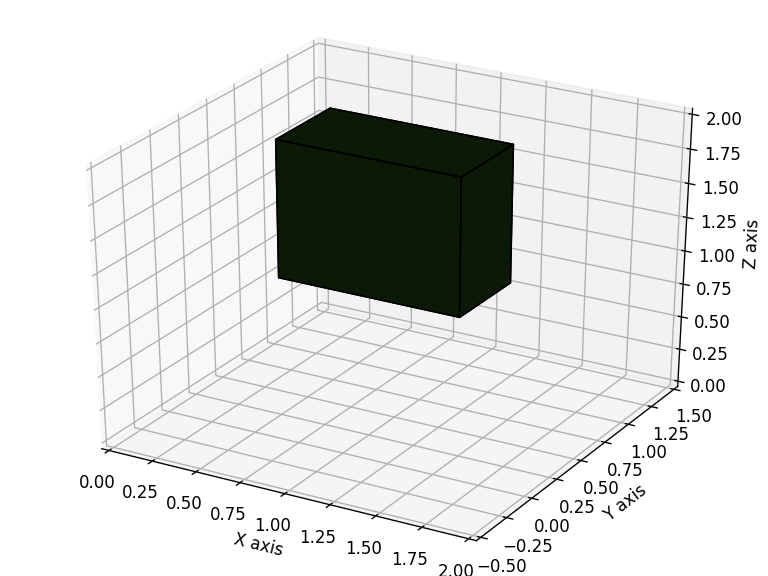

Plotting used 0.020839 seconds.


In [27]:
def f(x,y,z):
    return x==1 and y==0.5 and z==2 # pay attention with checking for equlity as changing the grid may result in 0 voxels

size = [1,0.5,1]
xstart,xstop,ystart,ystop,zstart,zstop = -10,10,-10,10,-10,10
cuboid = (xstart,xstop,ystart,ystop,zstart,zstop)
voxels = voxelizeSet(f,size,cuboid,**mat)
print(voxels)
plotObject(voxels,size=size,info=True)

Multiple functions can logically combined. If an object can be defined with simple math. Note the AND operator.

Voxels printed: 341. Faces printed: 2046. Lines drawn: 4092.

xmax=5.5, xmin=-7.5, ymax=7.75, ymin=-5.25, zmax=-1.0, zmin=-9.0
maxRange=13.0, xRange=13.0, yRange=13.0, zRange=8.0
xCenter=-1.0, yCenter=1.25, zCenter=-5.0

colorValues used for this plot:
{'(-0.039, 0.0, 0.0, 17.0, 0.0)': [0.047, 0.098, 0.027]} 
None


<IPython.core.display.Javascript object>


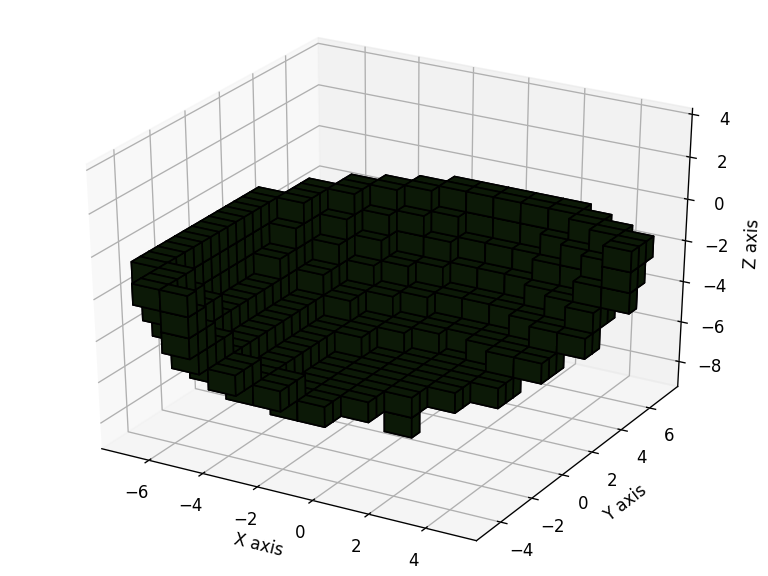

Plotting used 0.065134 seconds.


In [28]:
def cut(x,y,z):
    return x<= y and z < 0

def sphere(x,y,z):
    r2 = x**2+y**2+z**2
    return 7**2<=r2 and r2<=8**2

def f(x,y,z):
    return sphere(x,y,z) and cut(x,y,z)

voxels = voxelizeSet(f,size,cuboid,**mat)
plotObject(voxels,size=size,info=True)

## Rasterization Sorting removing Duplicates and Finalizing for Print
Before a voxel file can be printed we should consider certain aspects.

**Sorting**: To print voxels we first sort them in z, then in x and y direction

**removing duplicates**: while creating voxels one might have intersecting structures. This would result in some voxels printing twice.

**Rasterization**: Sometimes voxels might not be equal but close to each other. These can then result in the same problem as above. The solution is to rasterize the voxels befor removing duplicates. Every voxel gets rounded to the nearest point on a grid. The grid is ankered at 0,0,0 and has a specified grid-size. This allows to discretize voxel location. The coordinates can only be multiples of the grid-size.

**Finalizeing for print**: For stable printing one probably wonna do all of the above. `finalize` does just that. If one uses diffrent voxel sizes within one structure the three methods above have to be manually used.

An example follows play with and understand the principle

In [29]:
obj = np.array([(0,0,0.23,-0.066,0,7,0,0),(0,0,0.20,-0.066,0,7,0,0)],dtype=dt)
obj2 = copy(obj)
print('data:\n',obj)

obj = sort(obj)
print('sorted:\n',obj)

rasterize(obj,[1,1,0.25])
print('rasterized:\n',obj)

obj = unique(obj)
print('removed duplicates:\n',obj)

obj2 = finalize(obj2,[1,1,0.25])
print('all in one:\n',obj2)

data:
 [(0., 0., 0.23, -0.066, 0., 7., 0., 0.)
 (0., 0., 0.2 , -0.066, 0., 7., 0., 0.)]
sorted:
 [(0., 0., 0.2 , -0.066, 0., 7., 0., 0.)
 (0., 0., 0.23, -0.066, 0., 7., 0., 0.)]
rasterized:
 [(0., 0., 0.25, -0.066, 0., 7., 0., 0.)
 (0., 0., 0.25, -0.066, 0., 7., 0., 0.)]
removed duplicates:
 [(0., 0., 0.25, -0.066, 0., 7., 0., 0.)]
all in one:
 [(0., 0., 0.25, -0.066, 0., 7., 0., 0.)]


### Patterns generation
We provide an example of how to generate structures to test the influence of Vdepo on overhangs. First we need an overhang. We do not wonna parameterize the overhang every time from scratch. Therefor we define a function ``overhang`` that returns a parameterization of a hook and takes some handy parameters as input. ``overhang`` can for example be saved in **patterns.py** as it the case with ``line`` (here we did that allready). This is a reusable way of working. 

In [54]:
def overhang(x0,y0,z0,height,extend):
    '''
        This function returns a parameterization pf a pillar with an overhang in x direction.
    '''
    def f(t): # an overhang is just two lines parameterized subseq.
        if t<0.5:
            return line(x0,y0,z0,  x0,y0,z0+height)(2*t)
        else:
            return line(x0,y0,z0+height, x0+extend,y0,z0+height)(2*(t-0.5))
    return f

Next we define an array of overhangs with different properties. Note ussage of emtpy(), usefull to create structures iterativelly. It is used here to initialize voxels. We alternate **Vdepo** for every overhang. Note to reassing voxels to the output of finalize.

None


<IPython.core.display.Javascript object>


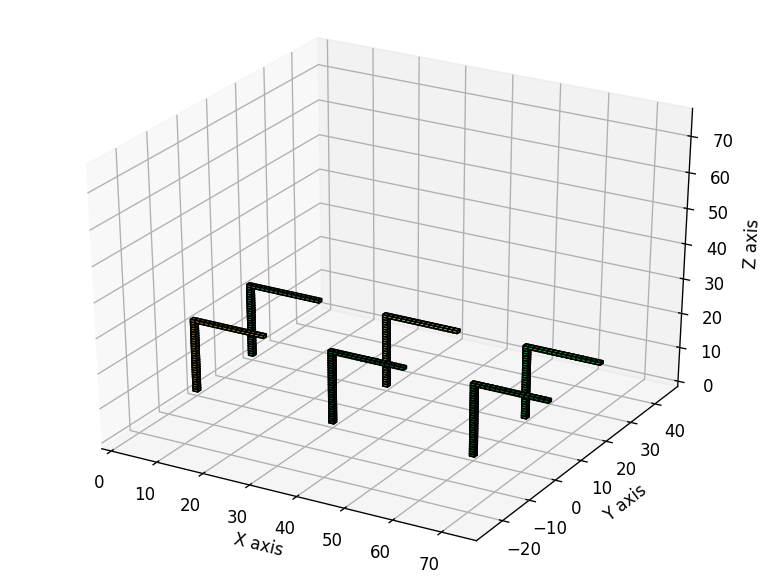

In [55]:
voxels = empty()
size = [1,1,0.7]
Vstart,delta = -1, -0.5

for i in range(0,3):
    for j in range(0,2):
        hook = voxelizeCurve(overhang(30*i,20*j,size[2],20,15),size,Vdepo=Vstart,p2=7)
        voxels = merge(voxels,hook)
        Vstart += delta
        
voxels = finalize(voxels,size) # IMPORTAT: reassing after finalizing, rasterizing, sorting, adding, ...
plotObject(voxels,size)

We verify the result by printing the first 6 voxels, so the base voxel of every overhang. Not the z staring position and the different Vdepo values.

In [53]:
print(voxels[0:6])

[( 0.,  0., 0.7, -1. , 0., 7., 0., 0.)
 ( 0., 20., 0.7, -1.5, 0., 7., 0., 0.)
 (30.,  0., 0.7, -2. , 0., 7., 0., 0.)
 (30., 20., 0.7, -2.5, 0., 7., 0., 0.)
 (60.,  0., 0.7, -3. , 0., 7., 0., 0.)
 (60., 20., 0.7, -3.5, 0., 7., 0., 0.)]


## Example of Workflow when creating a bike
First we create some usefull functions. If a function gets used multiple times we consider putting it into `patterns.py` directly

In [31]:
def pipe(x,y,z):
    """
    This function defines the set o point de
    """
    radius = 10
    thick = 2
    r2 = x**2 + z**2 # circle equation
    return (radius-thick/2)**2 <= r2 and r2 <= (radius+thick/2)**2


# this function takes 3 points and returns a function that checks if a point is "below" a plane
def plane(x0,y0,z0,x1,y1,z1,x2,y2,z2,invert=False):
    def f(x,y,z):
        val = 0 < -(y0*(z1-z2)-y1*(z0-z2)+y2*(z0-z1))*x +(x0*(z1-z2)-x1*(z0-z2)+x2*(z0-z1))*y +x0*(y1*z2-y2*z1)+x1*(y0*z2-y2*z0)-x2*(y0*z1-y1*z0) +z*(x0*(y1-y2)-x1*(y0-y2)+x2*(y0-y1))
        if invert:
            return not val
        return val
    return f

#parametrisation for the future handlebars
def bathTub(t):
    return 1 / (1 + exp(-40*abs(t-0.5)+10))

#plot bathtub parametrization
x = []
y = []
for i in range(1000):
    x.append(i/1000)
    y.append(bathTub(i/1000))
plt.plot(x,y,'-')
plt.show()

None


<IPython.core.display.Javascript object>


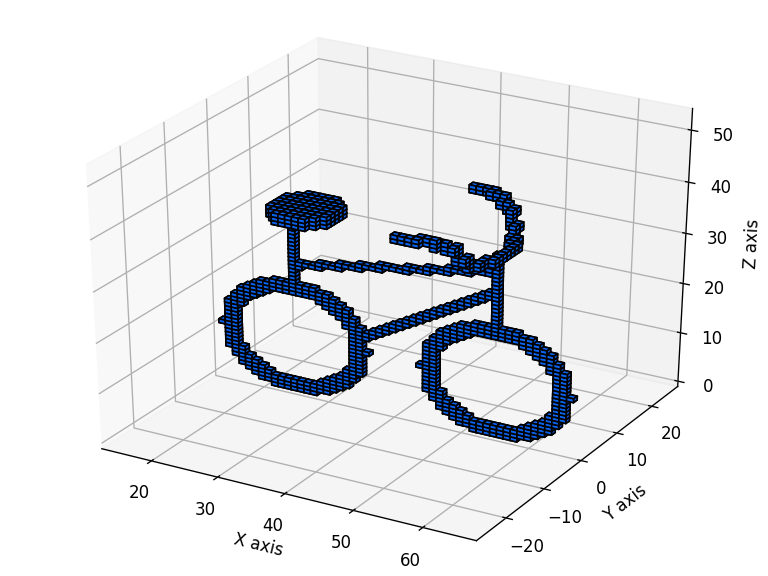

In [32]:
size = [1,1,0.75]
mat = {'Vdepo':-0.67,'p2':7}

saddleCuboid=[-10,10,-10,10,0,2]
def saddle(x,y,z):
    return (x**2 + y**2 < 5**2)

#parametrization of the handle bars
def handleBars(t):
    x = 10*sin(pi*t)
    y = 10*cos(pi*t)
    z = 5*bathTub(t)
    return [x,y,z]

# create Wheels and move them to position
cuboid = [-15,15,0,1,-15,15]
backWheel = voxelizeSet(pipe,size,cuboid,**mat)
frontWheel = copy(backWheel)
add(backWheel,x=25,y=0,z=10) 
add(frontWheel,x=55,y=0,z=10)

# create the Frame
frameBottom = voxelizeCurve(line(35,0,13, 55,0,28),size,**mat)
frameTop = voxelizeCurve(line(25,0,25, 55,0,32),size,**mat)
frameRear = voxelizeCurve(line(25,0,20, 25,0,35),size,**mat)
frameFront = voxelizeCurve(line(55,0,20, 55,0,35),size,**mat)
handleBars = voxelizeCurve(handleBars,size,**mat)

# handleBars
add(handleBars,46,0,35)
handleBarsFat = copy(handleBars)
add(handleBarsFat,z=size[2]) # add a second handle bar on top of the first one to make it thicker
saddle = voxelizeSet(saddle,size,saddleCuboid,**mat)

# saddle
saddle = add(saddle,27,0,35)
voxels = merge(frontWheel,backWheel,frameBottom,frameTop,frameRear,frameFront,handleBars,handleBarsFat,saddle)

# set z a starting height
voxels = moveBeyond(voxels,z=0.5)
voxels = finalize(voxels,size)
plotObject(voxels,size)

if False:
    save(voxels,path%'comftyBike2.csv')